# Word Clouds for Text Product Categories

## 📌Objectives of the Notebook

In this notebook, we will explore and visualize the text data associated with product codes using Word Clouds. This will help us better understand the most frequent words for each category and identify potential patterns.

## Key Steps:
✔ **Loading pre-cleaned text data**  → Import processed datasets (`X_train_cleaned.pkl` & `X_test_cleaned.pkl`)
✔  **Mapping product codes to labels** → Assign descriptive category names to product codes for better interpretability.  
✔  **Generating and visualizing Word Clouds** → Extract and display the most frequent words for each product category.   
✔  **Saving the labeled dataset** → Store the final processed data (`X_train_labeled.pkl) for future use.


## 1. Load Pickle Files (X_test_cleaned.pkl & X_test_cleaned.pkl)

In [107]:
import os
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import matplotlib  
%matplotlib inline

pd.set_option('display.max_colwidth', 400)  #You can adjust it

train_pickle_path = "../data/interim/X_train_cleaned.pkl"  
test_pickle_path = "../data/interim/X_test_cleaned.pkl" 



# Function to load a Pickle file safely
def load_pickle(file_path, dataset_name):
    if os.path.exists(file_path):
        try:
            data = pd.read_pickle(file_path)
            print(f"Successfully loaded `{dataset_name}` | Shape: {data.shape}\n")
            display(data.head())  # Display first few rows
            return data
        except Exception as e:
            print(f"Error loading `{dataset_name}`: {e}")
    else:
        print(f"File not found: {file_path}")
    return None

# Load both datasets
X_train  = load_pickle(train_pickle_path, "X_train_cleaned.pkl")
X_test = load_pickle(test_pickle_path, "X_test_cleaned.pkl")


Successfully loaded `X_train_cleaned.pkl` | Shape: (84916, 7)



designation  \
0                                                                                                                        Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.   
2                                                                                                                                    Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style   
3                                                                                                                                                 Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt)   
4                                                                                                                                                                                            La Guerre Des Tuques   

                                                                                                                                                                                                                                                                                                                                                                                                       description  \
0                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
1                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
2  PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<br> Pour un confort optimal et une précision maximale sur le GamePad de la Wii U: ce grand stylet hautement ergonomique est non seulement parfaitement adapté à votre main mais aussi très élégant.<br> Il est livré avec un support qui se fixe sans adhésif à l'arrière du GamePad<br> <br> Caractéristiqu...   
3                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
4                                                                                                                                                                                            Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans...   

    productid     imageid  prdtypecode  \
0  3804725264  1263597046           10   
1   436067568  1008141237         2280   
2   201115110   938777978           50   
3    50418756   457047496         1280   
4   278535884  1077757786         2705   

                                image_name  \
0  image_1263597046_product_3804725264.jpg   
1   image_1008141237_product_436067568.jpg   
2    image_938777978_product_201115110.jpg   
3     image_457047496_product_50418756.jpg   

Successfully loaded `X_test_cleaned.pkl` | Shape: (13812, 6)



designation  \
84916                  Folkmanis Puppets - 2732 - Marionnette Et Théâtre - Mini Turtle   
84917  Porte Flamme Gaxix - Flamebringer Gaxix - 136/220 - U - Twilight Of The Dragons   
84918                                                Pompe de filtration Speck Badu 95   
84919                                                      Robot de piscine électrique   
84920                             Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X 25 Mm   

                                                                                                                                                                                                                                                                                                                                                                                                           description  \
84916                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
84917                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
84918                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
84919  <p>Ce robot de piscine d&#39;un design innovant et élégant apportera un nettoyage efficace et rapide. Il est conçu pour tous types de revêtements tels que le vinyle le béton la fibre de verre et la céramique.Avec un dispositif de commande il est facile à régler le cycle de nettoyage et le temps. Il suffit de brancher ce robot et le mettre dans la piscine.Ses deux filtres à paniers intérieurs s...   
84920                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   

        productid     imageid                               image_name  \
84916   516376098  1019294171   image_1019294171_product_516376098.jpg   
84917   133389013  1274228667   image_1274228667_product_133389013.jpg   
84918  4128438366  1295960357  image_1295960357_product_4128438366.jpg   
84919  3929899732  1265224052  image_1265224052_product_3929899732.jpg   
84920   152993898   940543690    image_940543690_product_152993898.jpg   

                                                                                                                                                                                                                                                                                                                                                                                                                  text  
84916                                                                                                                                                                                                                      

## 2 Generating and Visualizing Word Clouds

Word Clouds help us quickly identify the most frequent words in each product category. This can provide insights into key terms associated with different categories.

### 2.1  Import Required Libraries

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2.2 Get unique product code values

In [109]:
import numpy as np

# === Get unique product codes === #
unique_product_codes = np.unique(X_train["prdtypecode"])

# Display unique values
print("Unique Product Codes:")
print(unique_product_codes)


Unique Product Codes:
[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]


### 2.2 Define a Function to Generate Word Clouds

In [110]:

# def plot_wordcloud(category, data, column="text"):
#     """
#     Generate and display a Word Cloud for a given product category, 
#     and print the most frequent words.

#     Parameters:
#     - category (int): The product category code to visualize.
#     - data (DataFrame): The dataset containing text data.
#     - column (str): The column containing the text (default: "text").
#     """
#     text_data = " ".join(data[data["prdtypecode"] == category][column].dropna())
    
#     # Generate the Word Cloud
#     wc = WordCloud(
#         background_color="black",  # Set background color to black for better contrast
#         max_words=100,             # Limit the number of words displayed in the Word Cloud
#         # stopwords=stop_words,    # (Optional) Stopwords were already removed in the preprocessing step
#         max_font_size=50,          # Set the maximum font size for the largest words
#         random_state=42,           # Ensure reproducibility by setting a random seed
# #         colormap="coolwarm"        # Use a color map for better word visualization
#     ).generate(text_data)

#     # Extract and display the most frequent words
#     word_frequencies = wc.words_  # Dictionary {word: frequency}
#     top_words = Counter(word_frequencies).most_common(10)  # Get top 10 words

#     print(f" Most frequent words for category {category}:")
#     for word, freq in top_words:
#         print(f"   {word}: {freq:.4f}")  # Print word and normalized frequency

#     # Display the Word Cloud
#     plt.figure(figsize=(15, 15))
#     plt.imshow(wc, interpolation="bilinear")
#     plt.axis("off")
#     plt.title(f"Word Cloud for {category}", fontsize=14)
#     plt.show()

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Global dictionary to store top words per category
word_freq_dict = {}

def plot_wordcloud(category, data, column="text"):
    """
    Generate and display a Word Cloud for a given product category,
    and store the most frequent words in a global dictionary.

    Parameters:
    - category (int): The product category code to visualize.
    - data (DataFrame): The dataset containing text data.
    - column (str): The column containing the text (default: "text").
    """
    text_data = " ".join(data[data["prdtypecode"] == category][column].dropna())
    
    # Generate the Word Cloud
    wc = WordCloud(
        background_color="black",  # Set background color to black for better contrast
        max_words=100,             # Limit the number of words displayed in the Word Cloud
        max_font_size=50,          # Set the maximum font size for the largest words
        random_state=42            # Ensure reproducibility
    ).generate(text_data)

    # Extract most frequent words
    word_frequencies = wc.words_  # Dictionary {word: frequency}
    top_words = Counter(word_frequencies).most_common(10)  # Get top 10 words

    # Store in global dictionary
    word_freq_dict[category] = top_words

    # Print most frequent words for the category
    print(f"\n Most frequent words for category {category}:")
    for word, freq in top_words:
        print(f"   {word}: {freq:.4f}")

    # Display the Word Cloud
    plt.figure(figsize=(15, 15))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {category}", fontsize=14)
    plt.show()


### 2.4 Generating Word Clouds for All Product Code Categories


 Most frequent words for category 10:
   tome: 1.0000
   edition: 0.8452
   histoire: 0.6190
   guide: 0.5179
   book: 0.4226
   collection: 0.4048
   vie: 0.3988
   france: 0.3810
   art: 0.3452
   volume: 0.2857


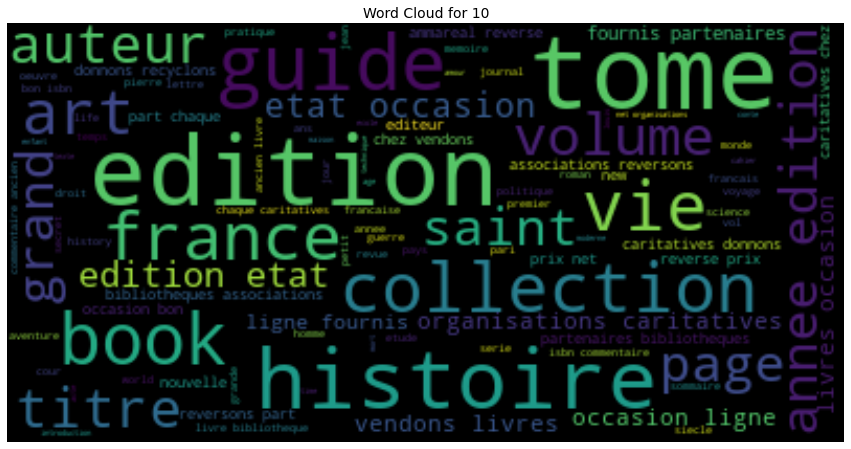

In [111]:
plot_wordcloud(10, X_train)



 Most frequent words for category 40:
   forfait comprend: 1.0000
   attention produit: 0.9000
   produit import: 0.9000
   import informations: 0.9000
   informations langues: 0.9000
   langues titres: 0.9000
   titres apparaissent: 0.9000
   apparaissent fiche: 0.9000
   fiche editeur: 0.9000
   editeur fournies: 0.9000


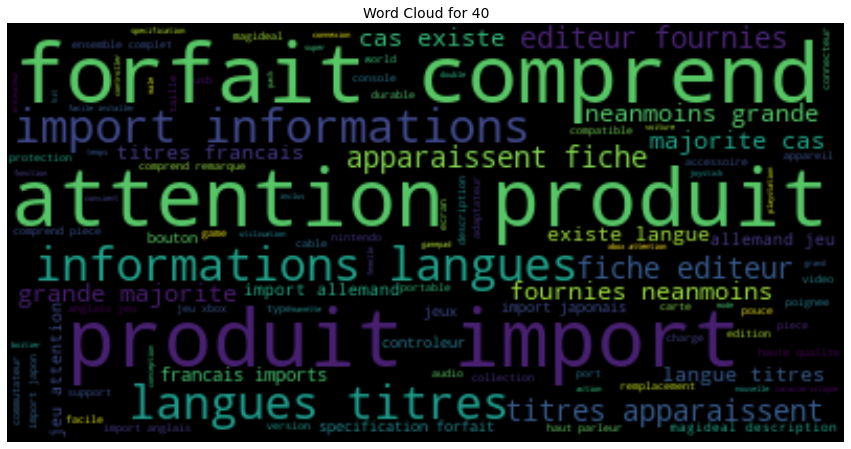

In [112]:
plot_wordcloud(40, X_train)



 Most frequent words for category 50:
   manette: 1.0000
   compatible: 0.8591
   controleur: 0.8255
   console: 0.8255
   jeu: 0.7752
   support: 0.7617
   usb: 0.7315
   charge: 0.7047
   cable: 0.7047
   fil: 0.5805


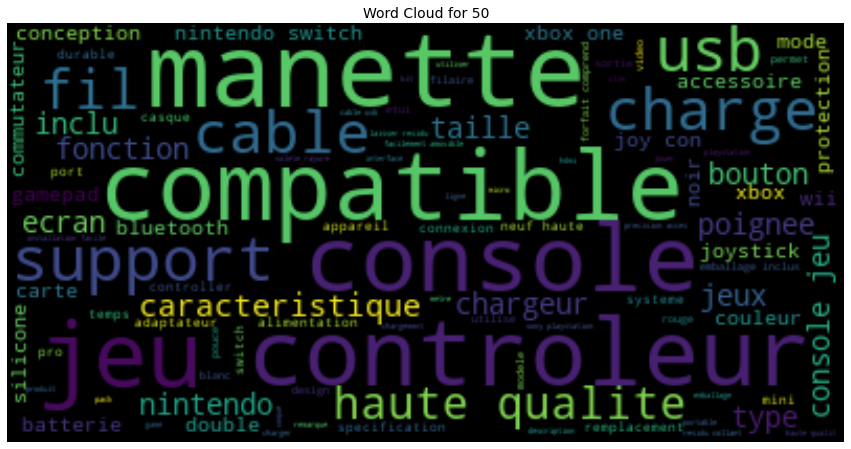

In [113]:
plot_wordcloud(50, X_train)



 Most frequent words for category 60:
   console jeu: 1.0000
   nom marque: 0.8369
   ouiecran tactile: 0.8010
   denumero modele: 0.5372
   couleur ouiecran: 0.5324
   tactile denumero: 0.5300
   ouitaille ecran: 0.5108
   affichage couleur: 0.5084
   couleur ouitaille: 0.4916
   numero modele: 0.4868


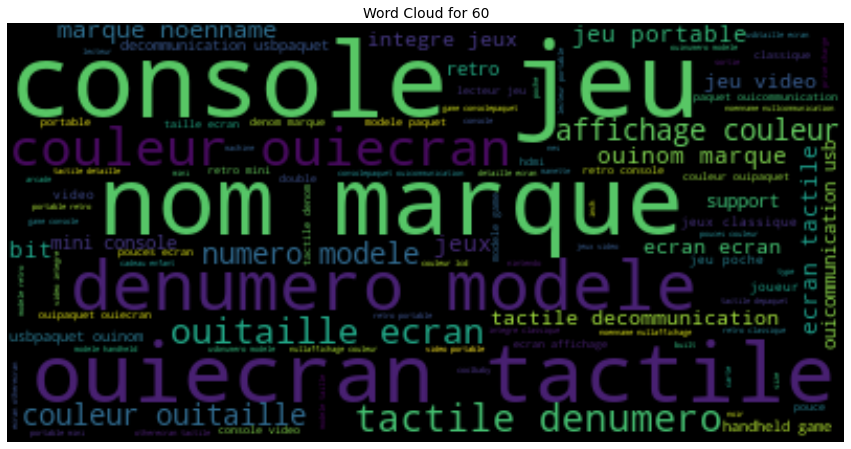

In [114]:
plot_wordcloud(60, X_train)



 Most frequent words for category 1140:
   figurine: 1.0000
   star wars: 0.2326
   serie: 0.2109
   collection: 0.1772
   licence officielle: 0.1554
   haute qualite: 0.1511
   taille env: 0.1402
   figurine pop: 0.1315
   shirt: 0.1228
   funko: 0.1196


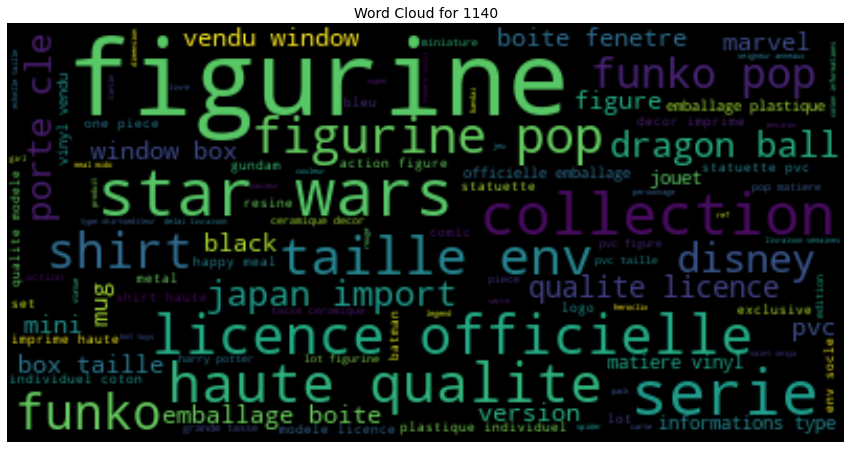

In [115]:
plot_wordcloud(1140, X_train)



 Most frequent words for category 1160:
   carte: 1.0000
   magic mtg: 0.7678
   carte pokemon: 0.6759
   commune: 0.6598
   rare: 0.4207
   dragon ball: 0.4207
   neuf carte: 0.4207
   pokemon: 0.3287
   foil: 0.2161
   magic: 0.2138


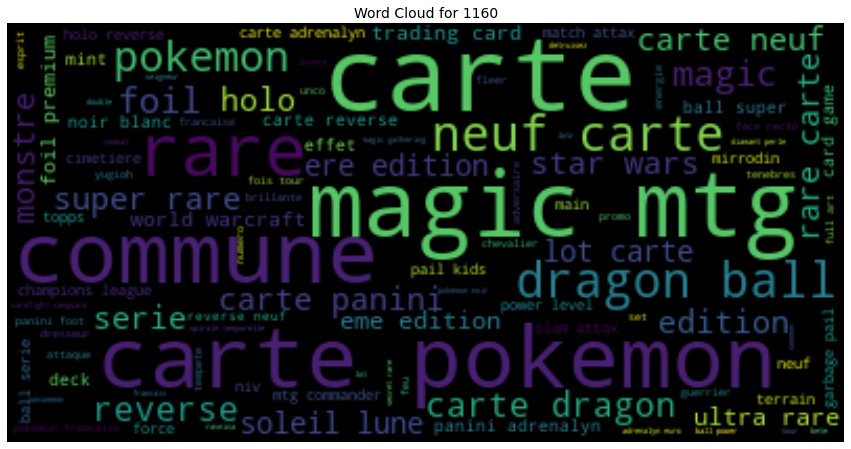

In [116]:
plot_wordcloud(1160, X_train)



 Most frequent words for category 1180:
   warhammer: 1.0000
   figurine: 0.8966
   heroclix: 0.8046
   masque: 0.5287
   jeu: 0.5057
   halloween: 0.4023
   prince august: 0.3908
   carte: 0.3678
   metal: 0.3448
   jeux role: 0.3103


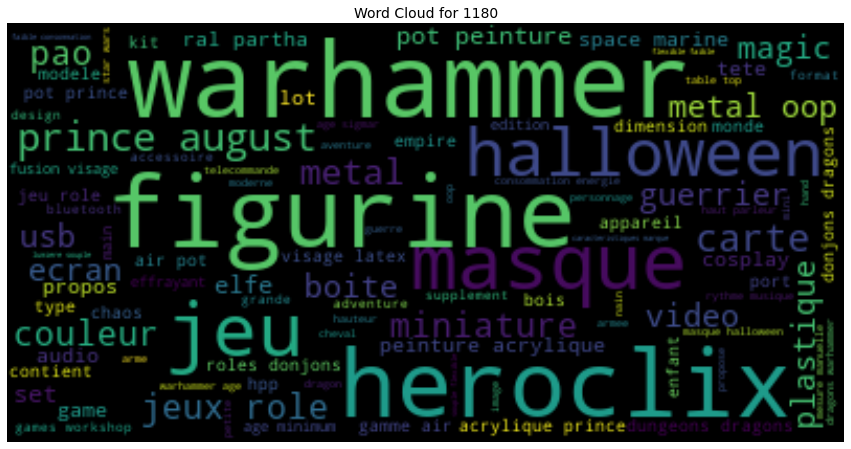

In [117]:
plot_wordcloud(1180, X_train)



 Most frequent words for category 1280:
   jouet: 1.0000
   enfant: 0.6784
   haute qualite: 0.5620
   toy: 0.4330
   caracteristique: 0.4012
   forfait comprend: 0.3735
   neuf haute: 0.3677
   jeu: 0.3518
   bebe: 0.3459
   modele: 0.3434


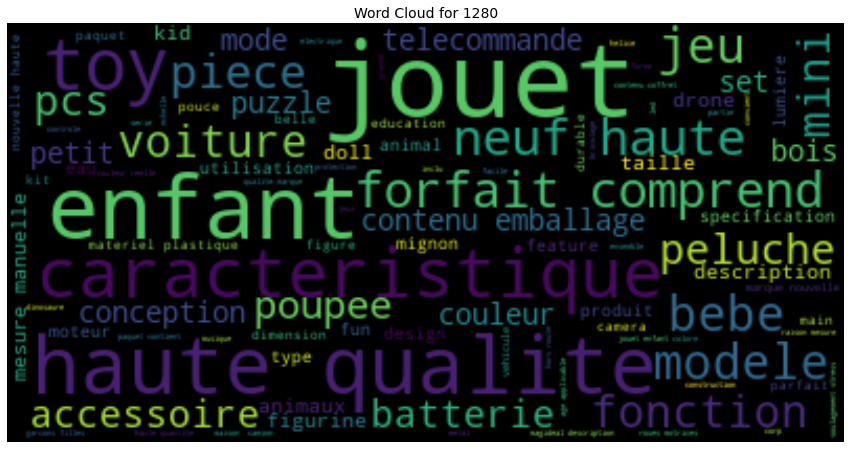

In [118]:
plot_wordcloud(1280, X_train)



 Most frequent words for category 1281:
   jeu: 1.0000
   jouet: 0.9664
   enfant: 0.9514
   carte: 0.5121
   game: 0.4710
   bebe: 0.4374
   card: 0.3738
   bois: 0.3607
   haute qualite: 0.3383
   couleur: 0.3364


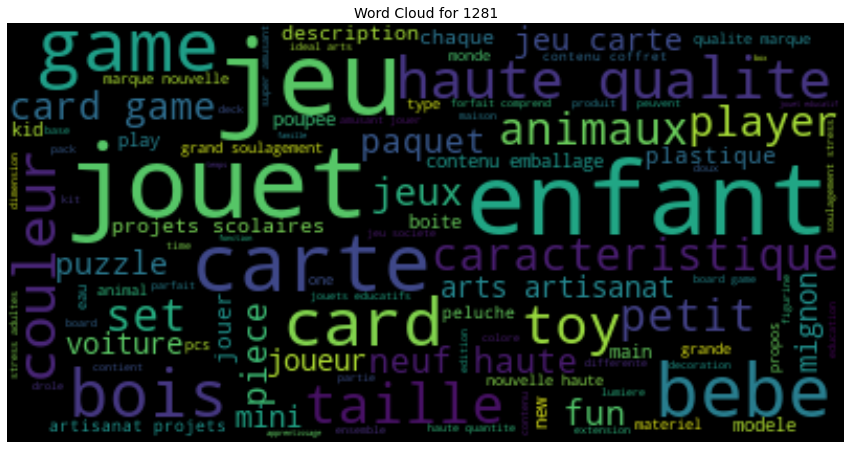

In [119]:
plot_wordcloud(1281, X_train)



 Most frequent words for category 1300:
   haute qualite: 1.0000
   batterie: 0.7405
   dji mavic: 0.6997
   caracteristique: 0.6821
   wifi fpv: 0.6698
   telecommande: 0.6671
   fonction: 0.5910
   maquette avion: 0.5829
   type: 0.5707
   forfait comprend: 0.5571


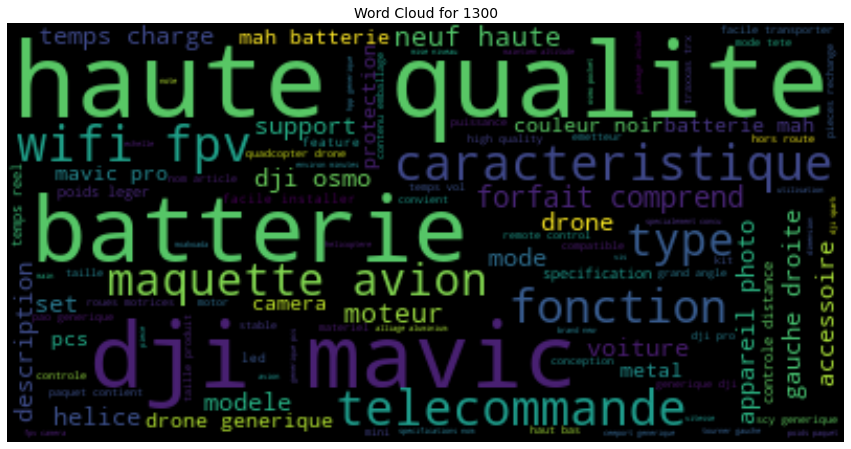

In [120]:
plot_wordcloud(1300, X_train)



 Most frequent words for category 1301:
   haute qualite: 1.0000
   materiaux haute: 0.7829
   grand cadeau: 0.7171
   mal peau: 0.6447
   sentiment main: 0.6217
   main molle: 0.6217
   cadeau sexe: 0.6184
   disponible gardez: 0.6151
   gardez pieds: 0.6151
   belle design: 0.6053


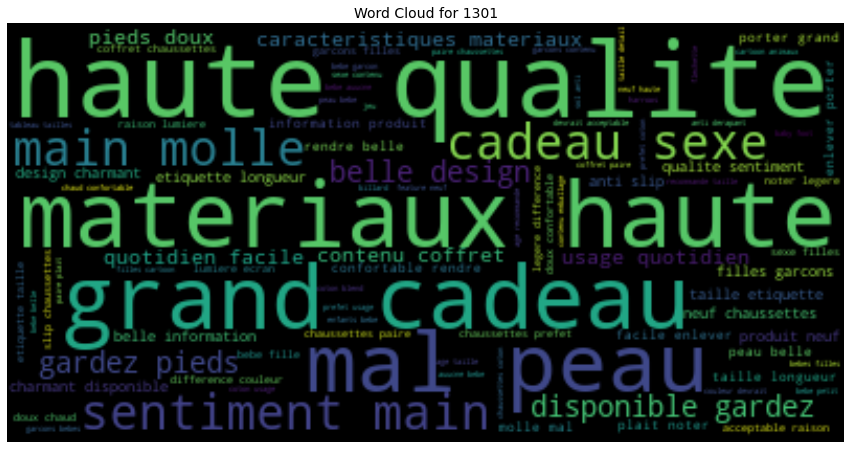

In [121]:
plot_wordcloud(1301, X_train)



 Most frequent words for category 1302:
   plein air: 1.0000
   enfant: 0.9848
   haute qualite: 0.9788
   neuf haute: 0.9242
   stream: 0.8545
   mode: 0.6455
   lampe poche: 0.6333
   mauvais sentiments: 0.6212
   age applicable: 0.6091
   forfait comprend: 0.6091


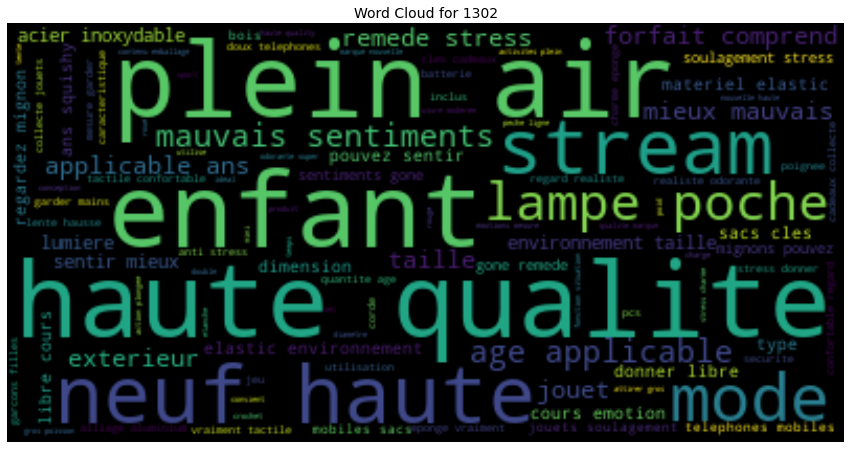

In [122]:
plot_wordcloud(1302, X_train)



 Most frequent words for category 1320:
   bebe: 1.0000
   enfant: 0.7467
   bavoir bebe: 0.3835
   haute qualite: 0.3806
   petit: 0.3430
   rose: 0.3314
   bebe imprime: 0.3300
   moniteurs image: 0.3155
   image refleter: 0.3155
   type style: 0.3140


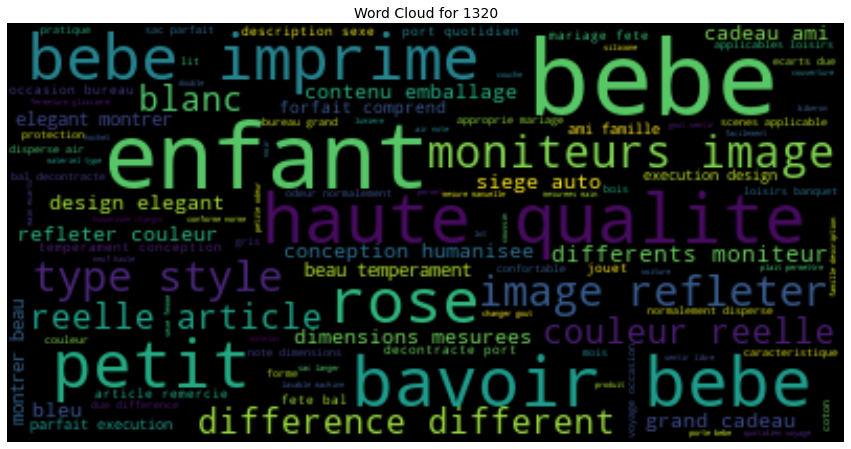

In [123]:
plot_wordcloud(1320, X_train)



 Most frequent words for category 1560:
   haute qualite: 1.0000
   class hps: 0.7597
   design: 0.7439
   salle manger: 0.5631
   chaise: 0.5352
   taille: 0.5146
   neuf haute: 0.4939
   porte: 0.4915
   blanc: 0.4830
   table: 0.4782


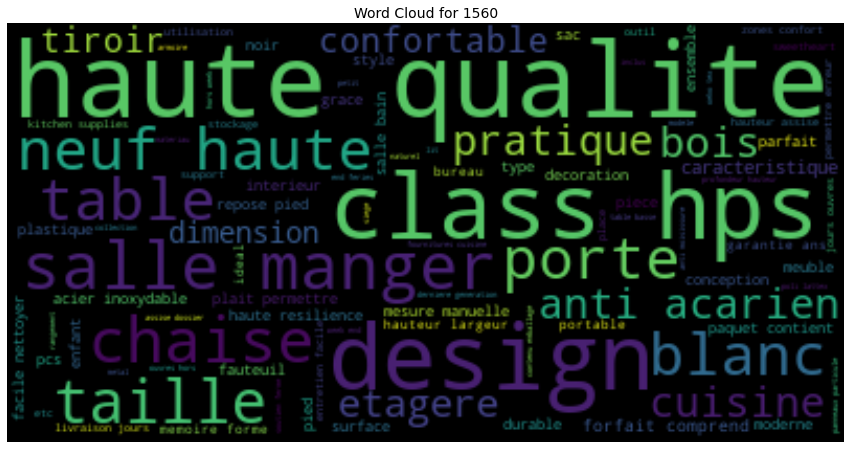

In [124]:
plot_wordcloud(1560, X_train)



 Most frequent words for category 1920:
   taie oreiller: 1.0000
   haute qualite: 0.9275
   plait permettre: 0.9198
   neuf haute: 0.7317
   home decor: 0.7276
   forfait comprend: 0.6828
   permettre legere: 0.6504
   legere deviation: 0.5531
   couleur mesure: 0.5430
   deviation couleur: 0.5413


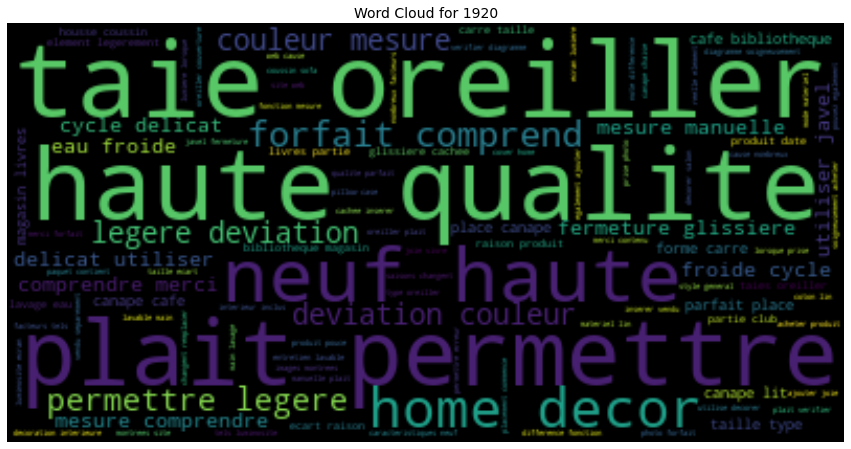

In [125]:
plot_wordcloud(1920, X_train)



 Most frequent words for category 1940:
   bio: 1.0000
   cafe: 0.8742
   lait: 0.5472
   sucre: 0.5409
   gout: 0.5031
   saveur: 0.4780
   chocolat: 0.4717
   sachet: 0.4465
   type produit: 0.4403
   general marque: 0.4277


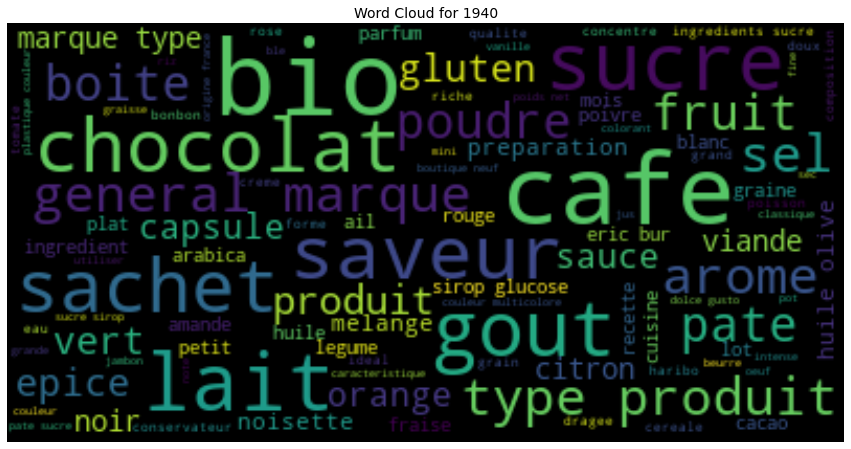

In [126]:
plot_wordcloud(1940, X_train)



 Most frequent words for category 2060:
   haute qualite: 1.0000
   forfait comprend: 0.9034
   led: 0.7204
   neuf haute: 0.6415
   contenu emballage: 0.4853
   salle bain: 0.4744
   caracteristique: 0.4425
   plait permettre: 0.3896
   chambre coucher: 0.3812
   marque nouvelle: 0.3778


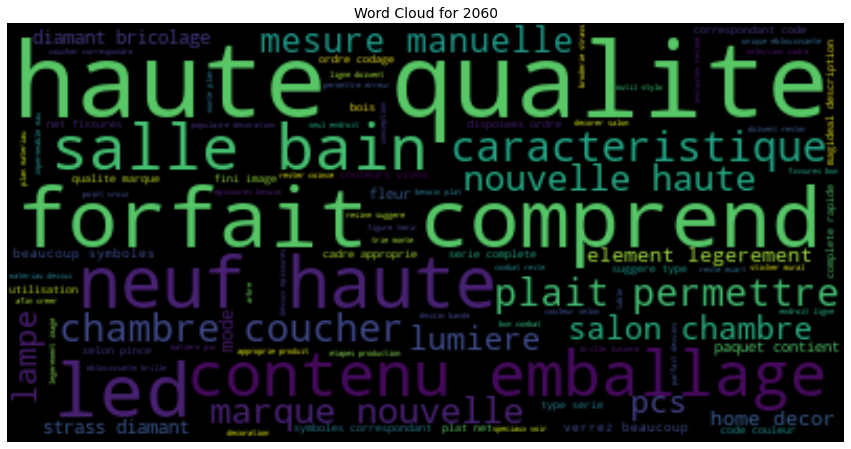

In [127]:
plot_wordcloud(2060, X_train)



 Most frequent words for category 2220:
   chien: 1.0000
   chat: 0.3525
   forfait comprend: 0.3006
   taille: 0.2987
   pet: 0.2894
   jouet: 0.2839
   animal compagnie: 0.2597
   reglable: 0.2523
   materiel: 0.2412
   animaux: 0.2375


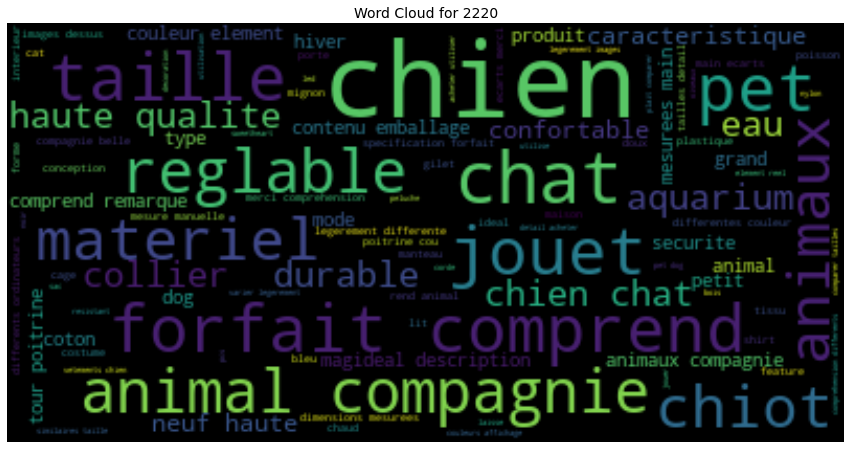

In [128]:
plot_wordcloud(2220, X_train)



 Most frequent words for category 2280:
   france: 1.0000
   pari: 0.8915
   monde: 0.7054
   magazine: 0.6860
   revue: 0.5581
   jean: 0.5581
   nouvelle: 0.4845
   histoire: 0.4574
   guerre: 0.4302
   art: 0.4186


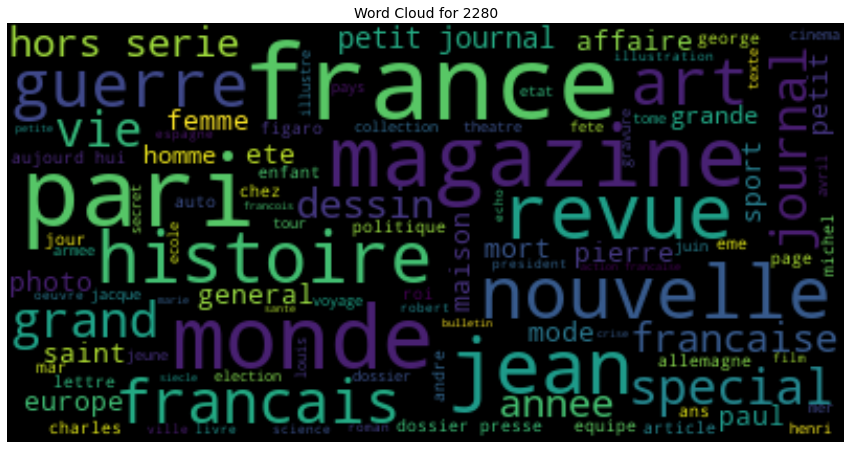

In [129]:
plot_wordcloud(2280, X_train)



 Most frequent words for category 2403:
   lot livre: 1.0000
   lot: 0.9050
   tome: 0.8294
   edition: 0.5445
   volume: 0.4733
   collection: 0.3338
   livres partitions: 0.3071
   annee: 0.2849
   lot revue: 0.2685
   histoire: 0.2122


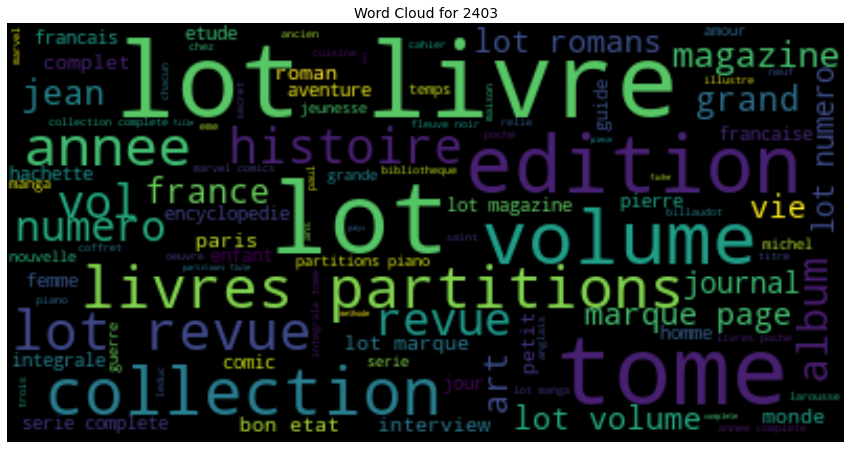

In [130]:
plot_wordcloud(2403, X_train)



 Most frequent words for category 2462:
   jeux: 1.0000
   lot: 0.6756
   voir photo: 0.4504
   playstation: 0.4427
   jeu neuf: 0.4351
   neuf voir: 0.4351
   manette: 0.4313
   console: 0.3817
   xbox: 0.3664
   lot jeux: 0.3664


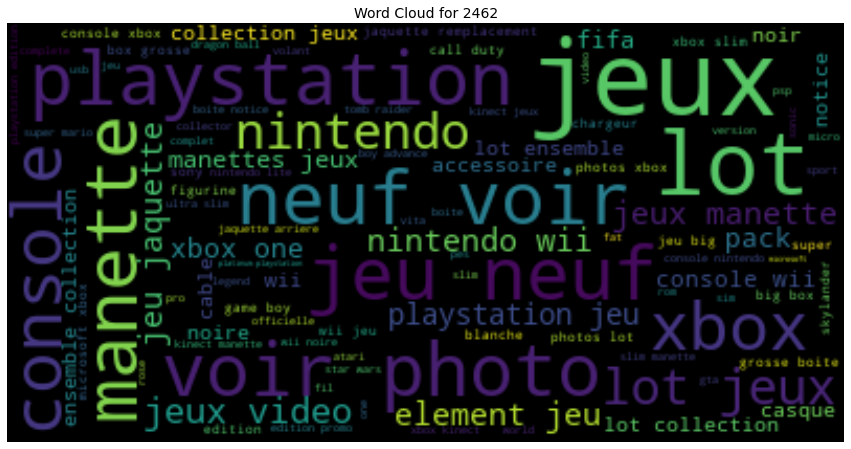

In [131]:
plot_wordcloud(2462, X_train)



 Most frequent words for category 2522:
   bloc note: 1.0000
   recto verso: 0.9340
   carnet note: 0.9340
   notes bloc: 0.9196
   papier haute: 0.9172
   jaune pale: 0.9112
   pages jaune: 0.9100
   taille format: 0.9088
   couverture solide: 0.9088
   solide design: 0.9088


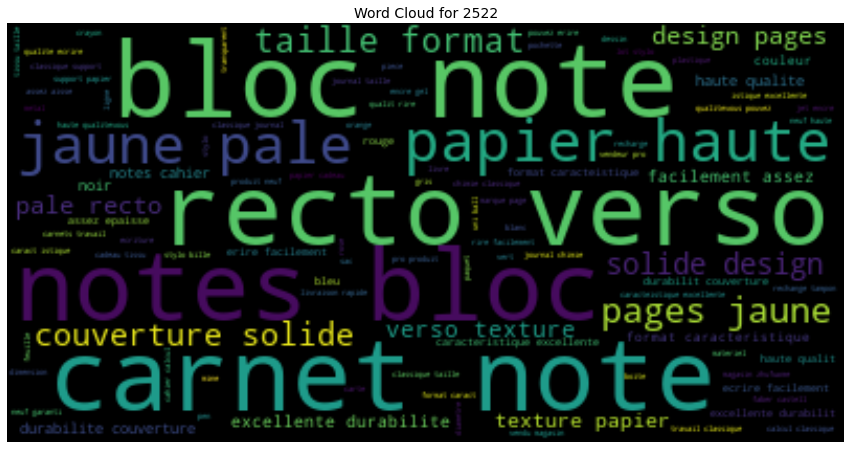

In [132]:
plot_wordcloud(2522, X_train)



 Most frequent words for category 2582:
   exterieur: 1.0000
   taille: 0.7906
   table: 0.7375
   haute qualite: 0.6906
   chaise: 0.6813
   high quality: 0.6375
   dimension: 0.6344
   bois: 0.6094
   brand new: 0.5938
   new high: 0.5906


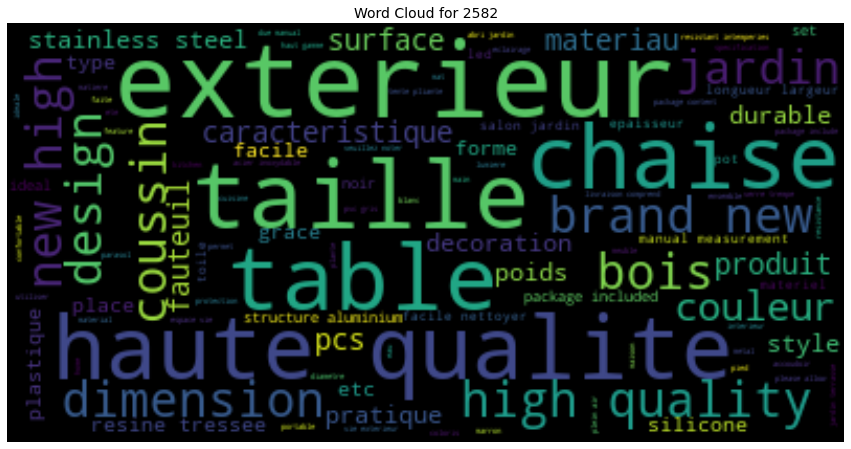

In [133]:
plot_wordcloud(2582, X_train)



 Most frequent words for category 2583:
   hors sol: 1.0000
   kit piscine: 0.6062
   dimensions exterieures: 0.5557
   volume eau: 0.4484
   tapis sol: 0.4275
   exterieures interieures: 0.3892
   filtration sable: 0.3524
   echelle securite: 0.3498
   spa: 0.3432
   garantie ans: 0.3407


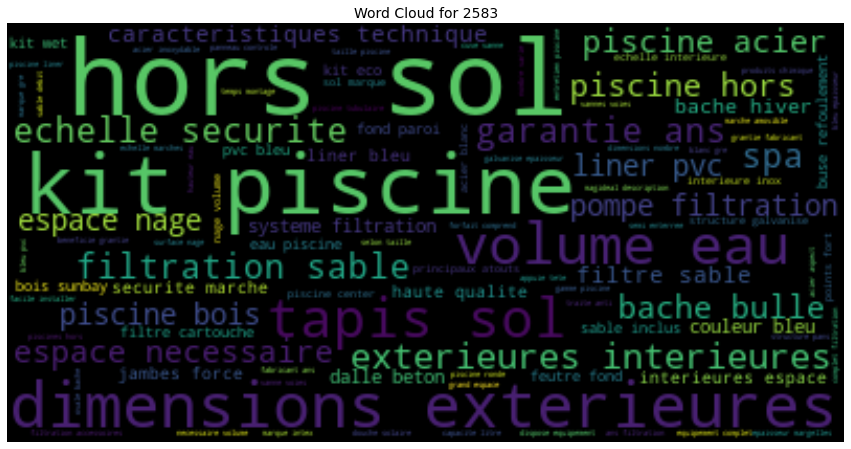

In [134]:
plot_wordcloud(2583, X_train)



 Most frequent words for category 2585:
   outil: 1.0000
   taille: 0.6538
   haute qualite: 0.6519
   eau: 0.5930
   caracteristique: 0.5267
   jardin: 0.4715
   produit: 0.4586
   tool: 0.4052
   duree vie: 0.3978
   poignee: 0.3867


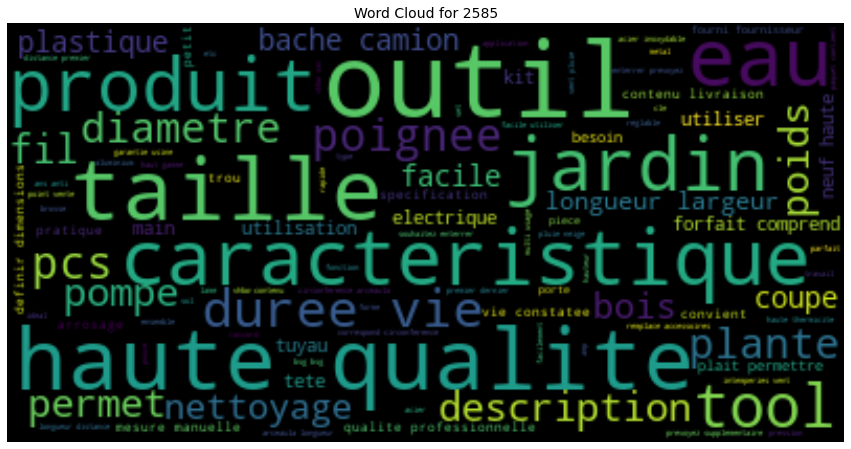

In [135]:
plot_wordcloud(2585, X_train)



 Most frequent words for category 2705:
   vie: 1.0000
   histoire: 0.8019
   homme: 0.7615
   monde: 0.7404
   livre: 0.6673
   temps: 0.4942
   grand: 0.4904
   ouvrage: 0.4885
   auteur: 0.4673
   politique: 0.4635


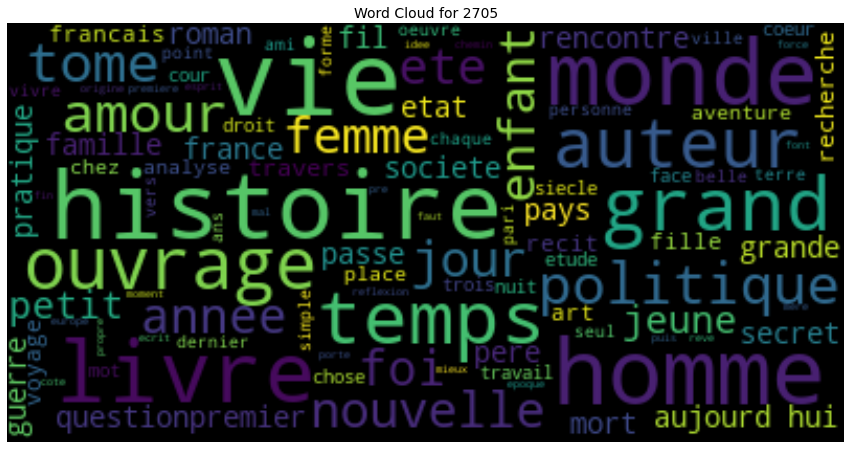

In [136]:
plot_wordcloud(2705, X_train)



 Most frequent words for category 2905:
   jeu telechargement: 1.0000
   configuration requise: 0.7275
   connexion internet: 0.6628
   telechargement note: 0.6513
   compte steam: 0.5831
   propos jeu: 0.5785
   caracteristique: 0.5473
   requise windows: 0.4376
   monde: 0.3961
   internet requise: 0.3464


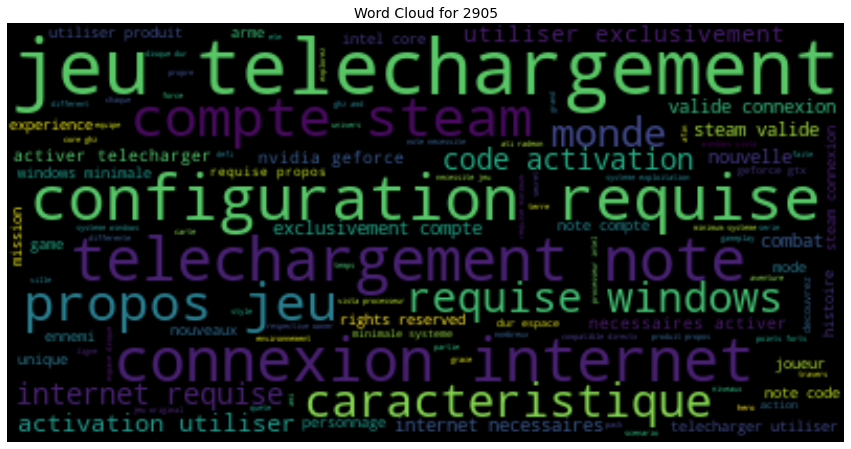

In [137]:
plot_wordcloud(2905, X_train)


### 2.5 Summary: Most Frequent Words by Product Category

In [138]:
print("\nSummary: Most Frequent Words by Product Category")
print("=" * 100)

for category, words in word_freq_dict.items():
    top_words = ", ".join([word for word, freq in words])
    print("-" * 100)
    print(f"Product Code {category:<5} | {top_words}")

print("=" * 100)



Summary: Most Frequent Words by Product Category
----------------------------------------------------------------------------------------------------
Product Code 10    | tome, edition, histoire, guide, book, collection, vie, france, art, volume
----------------------------------------------------------------------------------------------------
Product Code 40    | forfait comprend, attention produit, produit import, import informations, informations langues, langues titres, titres apparaissent, apparaissent fiche, fiche editeur, editeur fournies
----------------------------------------------------------------------------------------------------
Product Code 50    | manette, compatible, controleur, console, jeu, support, usb, charge, cable, fil
----------------------------------------------------------------------------------------------------
Product Code 60    | console jeu, nom marque, ouiecran tactile, denumero modele, couleur ouiecran, tactile denumero, ouitaille ecran, affichage

In [139]:
dict_prdtypecode = {
    "prdtypecode": [10, 40, 50, 60, 1140, 1160, 1180, 1280, 1281, 1300, 
                    1301, 1302, 1320, 1560, 1920, 1940, 2060, 2220, 2280, 
                    2403, 2462, 2522, 2582, 2583, 2585, 2705, 2905],  
 
    "Label": ["adult books", "imported video games", "video games accessories", "games and consoles", 
              "figurines and Toy Pop", "playing cards", "figurines, masks and role playing games", 
              "toys for children", "board games", "remote controlled models", "accessories children", 
              "toys, outdoor playing, clothes", "early childhood", "interior furniture and bedding", 
              "interior accessories", "Food", "decoration interior", "supplies for domestic animals", 
              "magazines", "children books and magazines", "games", "stationery", 
              "furniture kitchen and garden", "piscine spa", "gardening and DIY", "books", 
              "online distribution of video games"]
}


Missing product codes: []


### 2.6 📌 Identifying Product Category Labels from Word Cloud Analysis

By analyzing the **Word Cloud visualizations** and the **summary of most frequent words**, we were able to accurately identify the product categories associated with each `prdtypecode`. Below is the final mapping of **product categories to their respective product codes**:  

| **Product Code** | **Identified Category** |  
|-----------------|------------------------|  
| 10             | Adult Books |  
| 40             | Imported Video Games |  
| 50             | Video Games Accessories |  
| 60             | Games and Consoles |  
| 1140           | Figurines and Toy Pop |  
| 1160           | Playing Cards |  
| 1180           | Figurines, Masks, and Role-Playing Games |  
| 1280           | Toys for Children |  
| 1281           | Board Games |  
| 1300           | Remote Controlled Models |  
| 1301           | Accessories for Children |  
| 1302           | Toys, Outdoor Playing, and Clothes |  
| 1320           | Early Childhood |  
| 1560           | Interior Furniture and Bedding |  
| 1920           | Interior Accessories |  
| 1940           | Food |  
| 2060           | Decoration Interior |  
| 2220           | Supplies for Domestic Animals |  
| 2280           | Magazines |  
| 2403           | Children Books and Magazines |  
| 2462           | Games |  
| 2522           | Stationery |  
| 2582           | Furniture, Kitchen, and Garden |  
| 2583           | Piscine and Spa |  
| 2585           | Gardening and DIY |  
| 2705           | Books |  
| 2905           | Online Distribution of Video Games |  

 This labeling will now be used for further analysis and model training.  
 📌 **We will now add these category labels to our training dataset (`X_train`).**


### 2.7 Adding Category Labels to X_train

In [146]:
# Define the mapping of prdtypecode to category labels
dict_code_label = {
    10: "Adult Books",
    40: "Imported Video Games",
    50: "Video Games Accessories",
    60: "Games and Consoles",
    1140: "Figurines and Toy Pop",
    1160: "Playing Cards",
    1180: "Figurines, Masks, and Role-Playing Games",
    1280: "Toys for Children",
    1281: "Board Games",
    1300: "Remote Controlled Models",
    1301: "Accessories for Children",
    1302: "Toys, Outdoor Playing, and Clothes",
    1320: "Early Childhood",
    1560: "Interior Furniture and Bedding",
    1920: "Interior Accessories",
    1940: "Food",
    2060: "Decoration Interior",
    2220: "Supplies for Domestic Animals",
    2280: "Magazines",
    2403: "Children Books and Magazines",
    2462: "Games",
    2522: "Stationery",
    2582: "Furniture, Kitchen, and Garden",
    2583: "Piscine and Spa",
    2585: "Gardening and DIY",
    2705: "Books",
    2905: "Online Distribution of Video Games"
}

#  Add the category labels to X_train
X_train["Label"] = X_train["prdtypecode"].map(dict_code_label)

# Display a sample to verify
X_train.head()


designation  \
0                                                                                                                        Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.   
2                                                                                                                                    Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style   
3                                                                                                                                                 Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt)   
4                                                                                                                                                                                            La Guerre Des Tuques   

                                                                                                                                                                                                                                                                                                                                                                                                       description  \
0                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
1                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
2  PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<br> Pour un confort optimal et une précision maximale sur le GamePad de la Wii U: ce grand stylet hautement ergonomique est non seulement parfaitement adapté à votre main mais aussi très élégant.<br> Il est livré avec un support qui se fixe sans adhésif à l'arrière du GamePad<br> <br> Caractéristiqu...   
3                                                                                                                                                                                                                                                                                                                                                                                                             <NA>   
4                                                                                                                                                                                            Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en &ecirc;tre le vainqueur incontest&eacute;. Mais Sophie s'en m&ecirc;le et chambarde tous ses plans...   

    productid     imageid  prdtypecode  \
0  3804725264  1263597046           10   
1   436067568  1008141237         2280   
2   201115110   938777978           50   
3    50418756   457047496         1280   
4   278535884  1077757786         2705   

                                image_name  \
0  image_1263597046_product_3804725264.jpg   
1   image_1008141237_product_436067568.jpg   
2    image_938777978_product_201115110.jpg   
3     image_457047496_product_50418756.jpg   

# 4. Saving Updated Datasets for Future Use

To avoid reloading and recomputing the datasets in every notebook, we save the cleaned and labeled training dataset as a Pickle file. This will allow us to efficiently reuse the data in future steps without repeating the preprocessing.

The dataset will be saved as:

- **Training dataset**: `X_train_labeled.pkl`
- *(Not applicable for X_test, as it is used for challenge submission and cannot be labeled since it has no target values.)* 

In [148]:
import os
import pickle

# Define the directory and file name
pickle_dir = "../data/interim/"
os.makedirs(pickle_dir, exist_ok=True)

# Define file path for the labeled training dataset
train_pickle_path = os.path.join(pickle_dir, "X_train_labeled.pkl")

try:
    # Save updated training dataset
    X_train.to_pickle(train_pickle_path)
    print(f" Training dataset saved: {train_pickle_path}")

except Exception as e:
    print(f" Error saving training dataset: {e}")


 Training dataset saved: ../data/interim/X_train_labeled.pkl


## 5. 🔄 Next Steps  


We have now completed the **exploration and preprocessing of textual data**, from the initial dataset analysis to text cleaning and visualization using Word Clouds.  

The following notebooks were executed as part of this process:  

- **1_Project_and_Data_Overview.ipynb** → Initial project and data exploration  
- **2_CSV_Exploration_and_Visualization.ipynb** → CSV data exploration and visualization  
- **3_Image_Exploration_and_Visualization.ipynb** → Image dataset analysis  
- **4_Text_Cleaning.ipynb** → Text preprocessing and cleaning  

📌 **Next, we will proceed with the modeling phase, starting with separate models for text and image data. Once both approaches are optimized,, we will explore a multimodal (text + image) approach.** 
